### Title: The Birthday Paradox Puzzle

#### Puzzle: In a room of 23 people, the probability of two people sharing the same birthday is approximately 50%. It seems counter-intuitive at first, but by the use of simulations, we can witness the puzzle in action. 

##### Name: Kareena Satia

### Importing packages 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### Steps: 

1. Create dataframes of i rows (representing people) and 30 columns (representing different rooms) in the range of 1-365 (representing birthdays)
2. Adding the columns to a list 
3. Finding if there are any common numbers (shared birthdays) within a column (same room) 
4. If yes, then adding them and inserting them in a list 

In [2]:
inputs = []
# Creating a dataframe of different sized observations of range 1-365 with 30 columns (samples), changing the column names and 
# assigning them to an index
for i in np.arange(10,100,5): 
    globals()["common_" + str(i)] = 0 #counts number of people with same birthday
    
    # Creating a datframe with has observations (of birth date) for i persons (rows) in 30 rooms each (columns)
    globals()["df_"+str(i)] = pd.DataFrame(np.random.randint(1,365, size=(i,30)))
    globals()["df_"+str(i)] = globals()["df_"+str(i)].add_prefix('sample_') #changing column names by adding a prefix
    cols = globals()["df_"+str(i)].columns #assigning an index to column names
    a_dictionary = {} #creating a dictionary 
    # Looping through each column and adding their elements to a list  
    for ele in cols: 
        a_dictionary["l%sof%s" %(ele, i)] = globals()["df_"+str(i)][ele].tolist() #Adding observations to a list 
        locals().update(a_dictionary)
    # Checking if there are any common numbers in any column within itself and if so, then updating the common variable by 1. 
    for d in range(0,29):
        m = str("of")
        # Using the counter function to count the occurrences of values in each column and assigning it a variable
        globals()["counter_"+ str(d) + str(m) + str(i)] = Counter(globals()["lsample_" + str(d) + str(m) + str(i)])
        # Considering only those values which have a count of more than 1 and assigning it to a variable 
        globals()["count_"+ str(d) + str(m) + str(i)] = [el for el in globals()["counter_"+ str(d) + str(m) + str(i)].items() if el[1] > 1]
        # If length of the variable count is more than zero, then updating the common variable by 1. 
        if len(globals()["count_"+ str(d) + str(m) + str(i)]) > 0: # if length is zero, then there are no common values in a column
            globals()["common_" + str(i)] += 1
    inputs.append(globals()["common_" + str(i)]) #Adding the common variable to a list 
    print(i)
             


10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


### Calculating the probability by taking the number of samples which had two same numbers and dividing it by 30 


In [3]:
x = 0 
prob = []  # creating an empty list 

# Looping through the list of the number of samples which have a common value within them 
for inp in inputs:
    print(inp)
    globals()["prob_" + str(x)] = inp/30 # dividing the number of samples with common value by the total samples 
    prob.append(globals()["prob_" + str(x)]) # adding them to a list 
    x += 1
    


4
6
14
18
20
24
25
27
28
28
29
29
29
29
29
29
29
29


### Creating a dictionary to assign the number of people in the room (key) to the probability (values)


In [4]:
dicts = {}
keys = np.arange(10,100,5)
m = 0 
for i in keys: 
    dicts[i] = prob[m] 
    m += 1

print(dicts)

{10: 0.13333333333333333, 15: 0.2, 20: 0.4666666666666667, 25: 0.6, 30: 0.6666666666666666, 35: 0.8, 40: 0.8333333333333334, 45: 0.9, 50: 0.9333333333333333, 55: 0.9333333333333333, 60: 0.9666666666666667, 65: 0.9666666666666667, 70: 0.9666666666666667, 75: 0.9666666666666667, 80: 0.9666666666666667, 85: 0.9666666666666667, 90: 0.9666666666666667, 95: 0.9666666666666667}


### Creating variables from keys and values in the dictionary 


In [5]:
keys_g = dicts.keys()
values_g = dicts.values()

### Plotting the probability of two people sharing the same birthday against the number of people in the room. 


Text(0, 0.5, 'Probability that two people share the same birthday')

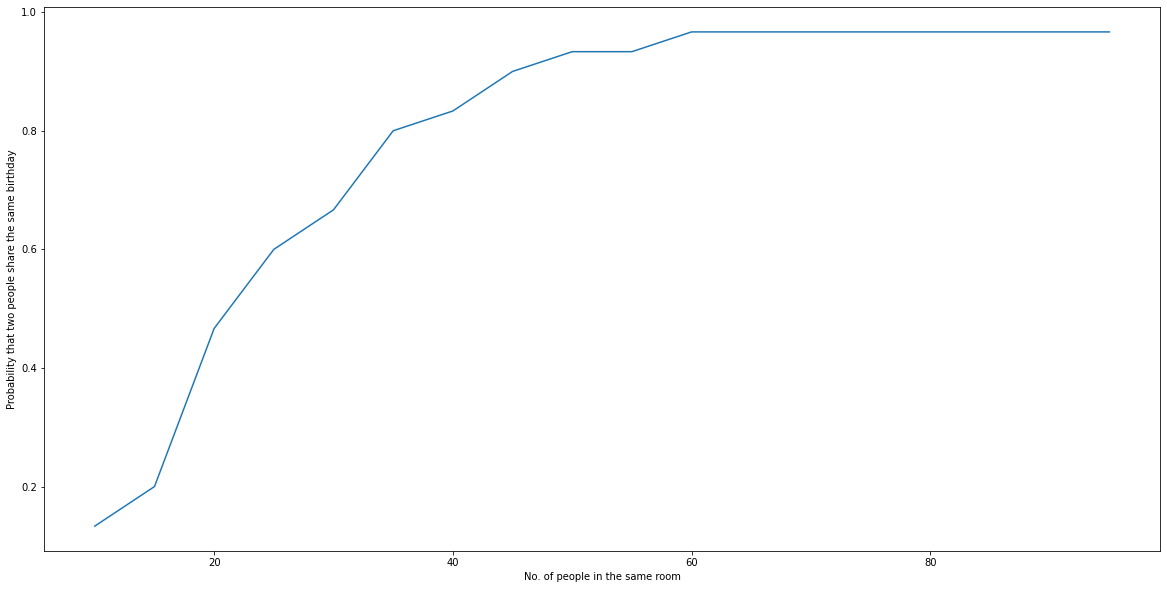

In [6]:
plt.figure(figsize=(20,10))
plt.plot(keys_g,values_g)
plt.xlabel('No. of people in the same room')
plt.ylabel('Probability that two people share the same birthday')
